In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import time

import Featurizer as ft

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
pd.set_option('display.max_columns', 50)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12.0,8.0]

In [4]:
df_train = pd.read_csv("../data/palabras.csv")

## Pre-processing

In [5]:
X = df_train.drop("precio", axis=1)
y = df_train['precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [6]:
X_train_submit = X_train.copy()

In [7]:
import category_encoders as ce

OHE = ce.PolynomialEncoder( handle_unknown='ignore')
BE = ce.BinaryEncoder( handle_unknown='ignore')

In [8]:
X_train = ft.preprocess(X_train, OHE, BE, 'train')
X_test = ft.preprocess(X_test, OHE, BE, 'test')

--- 3.045151472091675 seconds ---
--- 0.4398508071899414 seconds ---


In [9]:
print(f"Original shapes: X={X.shape} y={y.shape}")
print(f"Train shapes: X={X_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={X_test.shape}  y={y_test.shape}")

Original shapes: X=(240000, 81) y=(240000,)
Train shapes: X=(180000, 143) y=(180000,)
Test  shapes: X=(60000, 143)  y=(60000,)


## Feature Selection

In [10]:
#from sklearn.feature_selection import SelectKBest

In [11]:
#selection = SelectKBest(k=40)
#x_features = selection.fit_transform(X_train, y_train)
#columns = np.asarray(X_train.columns.values)
#support = np.asarray(selection.get_support())
#columns_with_support = columns[support]

In [12]:
#columns_with_support

###### Training

In [10]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1000,n_jobs=3,objective="reg:squarederror", max_depth= 14,min_child_weight = 10,colsample_bytree=0.5, gamma=1, learning_rate=0.1, subsample=1,)
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=14, min_child_weight=10, missing=None, n_estimators=1000,
             n_jobs=3, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [11]:
start_time = time.time()
model.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 945.3185694217682 seconds ---


## Predicciones

In [12]:
ft.predecir(model, X_train, y_train, X_test, y_test)

Entrenamiento: 99.8489%
Testeo: 82.8697%.
Mean abs error: 514142.2095.


In [18]:
plt.rcParams["figure.figsize"] = [15, 15]

importancia = model.feature_importances_

d = {'x':X_train.columns,'y':importancia}

df_importancia = pd.DataFrame(d)

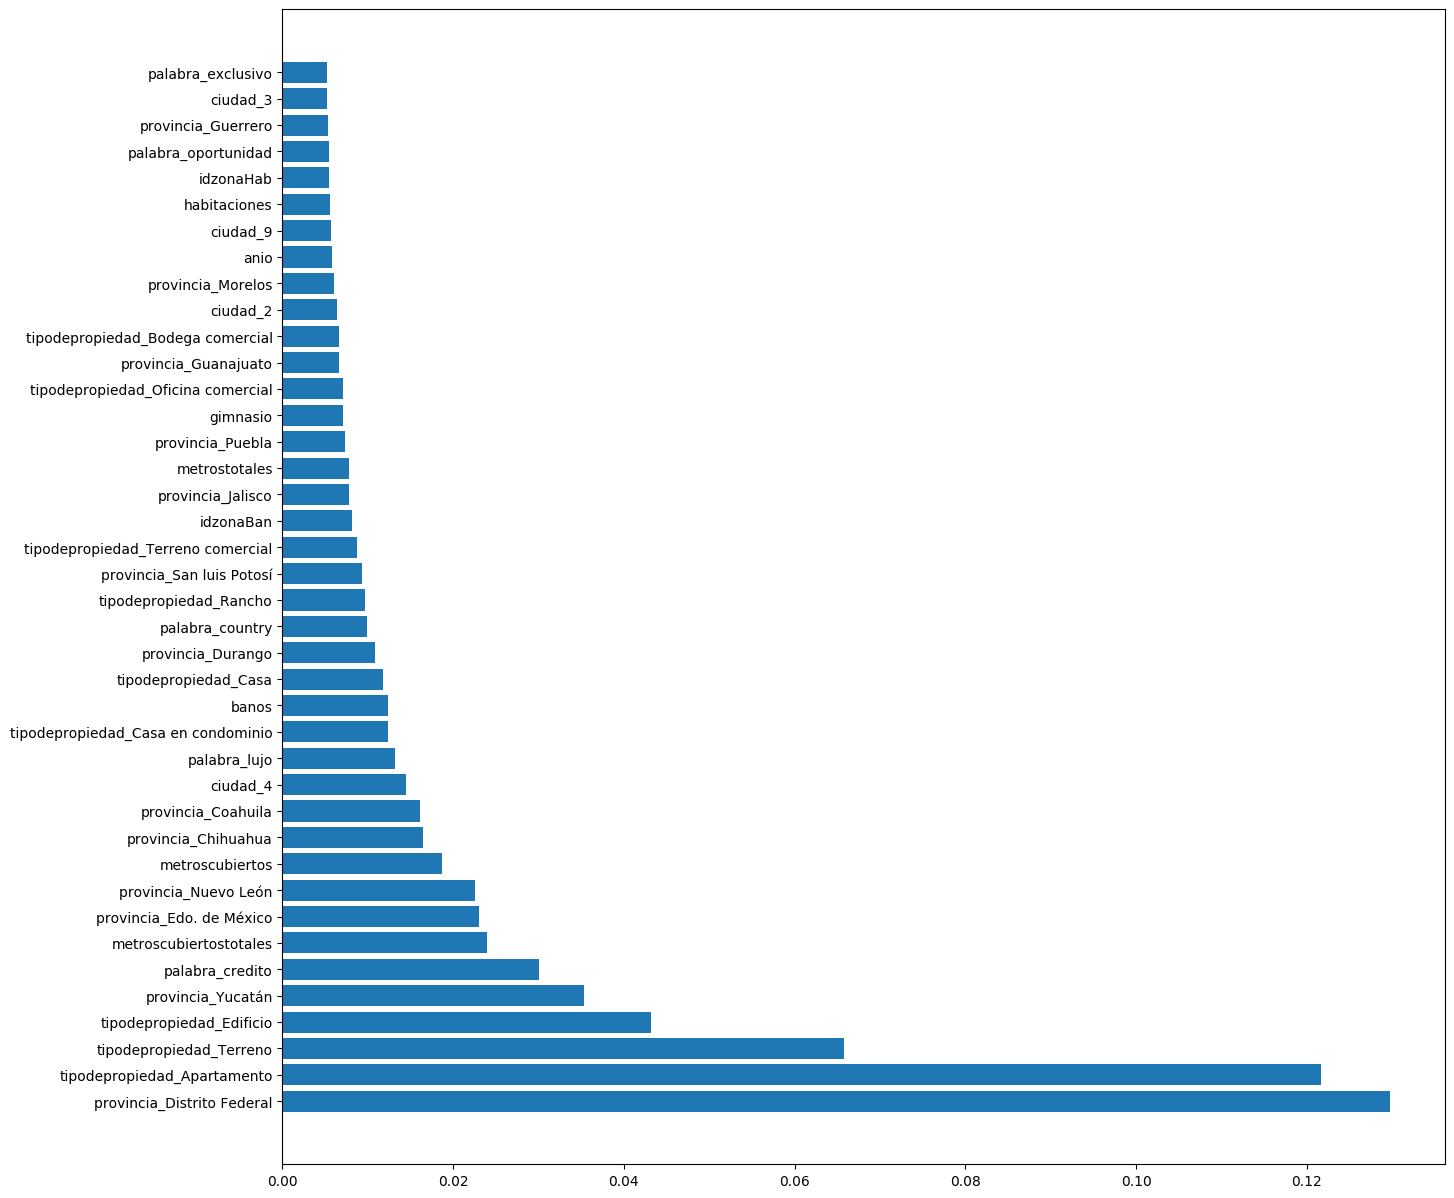

In [19]:
importancia = df_importancia.sort_values(by="y",ascending=False).head(40)
ax = plt.barh(importancia.x,importancia.y)

## Submission

In [20]:
df_test = pd.read_csv('../data/test.csv')

In [21]:
df = df_test.copy()
df = ft.init_test(df)

In [22]:
df = ft.preprocess(df, OHE, BE, 'test')

--- 15.45613169670105 seconds ---


In [23]:
submit_prediction = model.predict( df )

In [24]:
#cols_diff = []
#ft = X_train.columns.values
#fs = df.columns.values
#for feat in fs:
#    if feat not in ft:
#        cols_diff.append(feat)
        
#display(cols_diff)        

In [25]:
#pd.concat([df_test[['id']], pd.Series(submit_prediction)], axis=1).rename(columns={0:"target"}).to_csv("../data/submission13.csv", index=False)

In [26]:
from submission_helper import submission_output

output = submission_output(df_test, submit_prediction)

nombre_submit = 'submissionTest.csv'

output.to_csv('../data/'+nombre_submit, index=False)

In [13]:
X = df_train.drop("precio", axis=1)
y = df_train['precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [14]:
import category_encoders as ce

OHE = ce.SumEncoder( handle_unknown='ignore')
BE = ce.BinaryEncoder( handle_unknown='ignore')

In [15]:
X_train_sum = ft.preprocess(X_train, OHE, BE, 'train')
X_test_sum = ft.preprocess(X_test, OHE, BE, 'test')

--- 2.6225576400756836 seconds ---
--- 0.38022351264953613 seconds ---


In [16]:
import category_encoders as ce

OHE = ce.BackwardDifferenceEncoder( handle_unknown='ignore')
BE = ce.BinaryEncoder( handle_unknown='ignore')

In [18]:
X_train_BDE = ft.preprocess(X_train, OHE, BE, 'train')
X_test_BDE = ft.preprocess(X_test, OHE, BE, 'test')

--- 2.4939370155334473 seconds ---
--- 0.5564589500427246 seconds ---


In [19]:
import category_encoders as ce

OHE = ce.HelmertEncoder( handle_unknown='ignore')
BE = ce.BinaryEncoder( handle_unknown='ignore')

In [20]:
X_train_HE = ft.preprocess(X_train, OHE, BE, 'train')
X_test_HE = ft.preprocess(X_test, OHE, BE, 'test')

--- 3.0874459743499756 seconds ---
--- 0.38446903228759766 seconds ---


In [21]:
start_time = time.time()
model.fit(X_train_sum, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 777.1718504428864 seconds ---


In [22]:
ft.predecir(model, X_train_sum, y_train, X_test_sum, y_test)

Entrenamiento: 99.6425%
Testeo: 82.8686%.
Mean abs error: 517961.4645.


In [23]:
start_time = time.time()
model.fit(X_train_BDE, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 821.2832345962524 seconds ---


In [24]:
ft.predecir(model, X_train_BDE, y_train, X_test_BDE, y_test)

Entrenamiento: 99.8499%
Testeo: 82.8332%.
Mean abs error: 517711.0098.


In [25]:
start_time = time.time()
model.fit(X_train_HE, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 810.4117956161499 seconds ---


In [26]:
ft.predecir(model, X_train_HE, y_train, X_test_HE, y_test)

Entrenamiento: 99.7618%
Testeo: 82.9257%.
Mean abs error: 516642.0822.
